# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Abdi Jepri Bangun
- Email: abdijepri@gmail.com
- Id Dicoding: a012ybf002

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

### Menyiapkan data yang akan digunakan

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Membaca dataset dan menampilkan 5 baris pertama
students_df = pd.read_csv('/content/drive/MyDrive/LaskarAi/Data Science/data.csv', sep=';')
students_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [38]:
students_df.shape

(4424, 37)

In [39]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Penjelasan**

Dataset Overview

Dataset ini terdiri dari 4424 baris dan 37 kolom, masing-masing mewakili informasi terkait mahasiswa dan status akademiknya. Data ini mencakup berbagai fitur demografis, akademik, dan sosial ekonomi, serta variabel target yang disebut Status.

Struktur Data
Berikut adalah beberapa insight awal dari struktur dataset:

Semua kolom tidak memiliki nilai null atau missing, sehingga data dalam kondisi lengkap.

Tipe data:

Numerik (int64 dan float64) mendominasi sebagian besar fitur.

Kolom target Status bertipe object/string, yang nantinya akan perlu di-encode sebagai label numerik.

In [40]:
students_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### EDA (Exploratory Data Analysis)

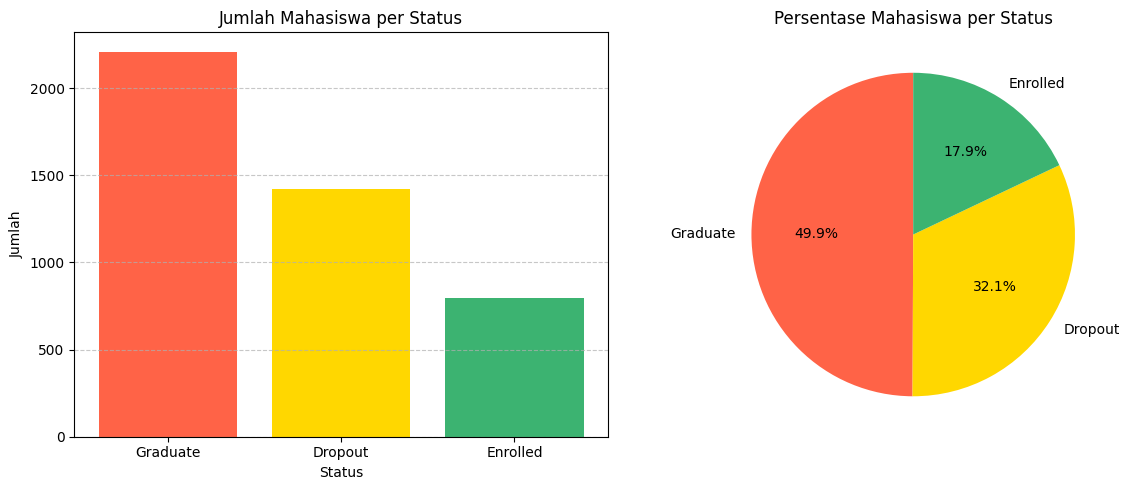

In [41]:
status_counts = students_df['Status'].value_counts().rename_axis('Status').reset_index(name='Count')
status_percent = students_df['Status'].value_counts(normalize=True).mul(100).rename_axis('Status').reset_index(name='Percentage')

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Diagram batang (jumlah)
axes[0].bar(status_counts['Status'], status_counts['Count'], color=['tomato', 'gold', 'mediumseagreen'])
axes[0].set_title('Jumlah Mahasiswa per Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Jumlah')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Diagram pie (persentase)
axes[1].pie(
    status_percent['Percentage'],
    labels=status_percent['Status'],
    autopct='%.1f%%',
    startangle=90,
    colors=['tomato', 'gold', 'mediumseagreen']
)
axes[1].set_title('Persentase Mahasiswa per Status')

plt.tight_layout()
plt.show()

**Insight**

1. Jumlah Mahasiswa per Status

Total Lulusan: Grafik batang yang mewakili lulusan menunjukkan bahwa terdapat lebih dari 2000 mahasiswa yang telah lulus. Ini merupakan kelompok terbesar di antara ketiga status yang ada.
Total Mahasiswa Aktif: Jumlah mahasiswa yang saat ini masih terdaftar cukup signifikan, meskipun lebih sedikit dibandingkan jumlah lulusan. Hal ini menunjukkan adanya arus masuk mahasiswa baru yang sehat.
Total Dropout: Jumlah mahasiswa yang keluar dari program (dropout) adalah yang paling rendah di antara ketiganya, menunjukkan bahwa sistem berhasil mempertahankan sebagian besar mahasiswanya.

2. Persentase Mahasiswa per Status

Lulusan (49,9%): Hampir setengah dari total mahasiswa telah lulus, menandakan program pendidikan yang kuat dan hasil yang baik bagi mahasiswa.
Dropout (32,1%): Proporsi mahasiswa yang keluar cukup besar dan perlu mendapat perhatian.
Terdaftar (17,9%): Persentase mahasiswa yang saat ini masih aktif merupakan yang terkecil,

**Kesimpulan**
Data menunjukkan tingkat kelulusan yang tinggi, yang merupakan indikasi positif atas efektivitas institusi.
Namun, perlu dilakukan kajian lebih lanjut terhadap tingkat dropout yang cukup besar, karena mewakili persentase yang signifikan dari populasi mahasiswa. Diperlukan inisiatif untuk meningkatkan strategi retensi guna menurunkan angka ini.

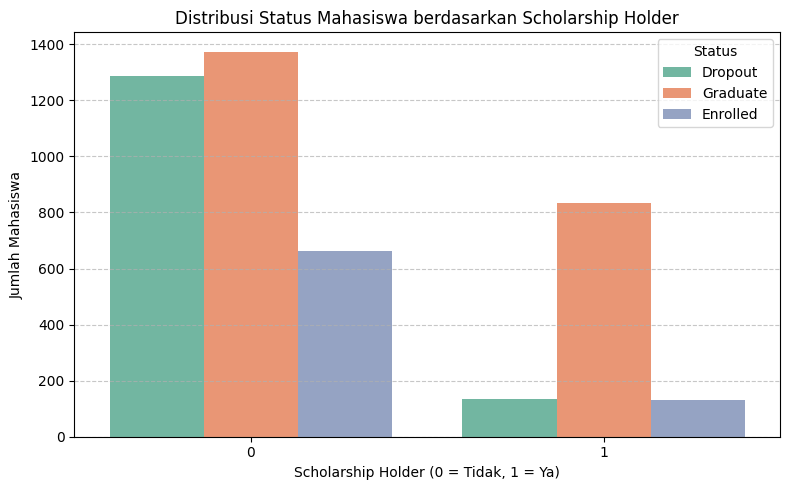

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=students_df, x='Scholarship_holder', hue='Status', palette='Set2')
plt.title('Distribusi Status Mahasiswa berdasarkan Scholarship Holder')
plt.xlabel('Scholarship Holder (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Penjelasan**

Penerima Beasiswa vs Non-Penerima Beasiswa

Mahasiswa yang tidak menerima beasiswa jauh lebih banyak dibanding penerima beasiswa, yaitu lebih dari 1.400 orang. Hal ini menunjukkan bahwa sebagian besar mahasiswa menempuh studi tanpa bantuan finansial tambahan.

Status Mahasiswa Non-Penerima Beasiswa

Mayoritas non-penerima beasiswa berstatus terdaftar (enrolled), diikuti oleh lulusan dan jumlah dropout yang lebih sedikit. Ini menunjukkan bahwa banyak mahasiswa tetap bertahan dan menyelesaikan studi meski tanpa beasiswa.

Status Mahasiswa Penerima Beasiswa

Penerima beasiswa sebagian besar juga berstatus terdaftar, namun jumlah mereka jauh lebih sedikit. Tingkat dropout di kelompok ini tampak lebih rendah, yang mengindikasikan beasiswa berperan dalam meningkatkan retensi mahasiswa.

**Kesimpulan**

Beasiswa berpotensi meningkatkan retensi dan menurunkan dropout. Namun, perlu analisis lebih lanjut terhadap faktor lain seperti dukungan akademik dan kondisi sosial ekonomi untuk memahami penyebab perbedaan status mahasiswa.

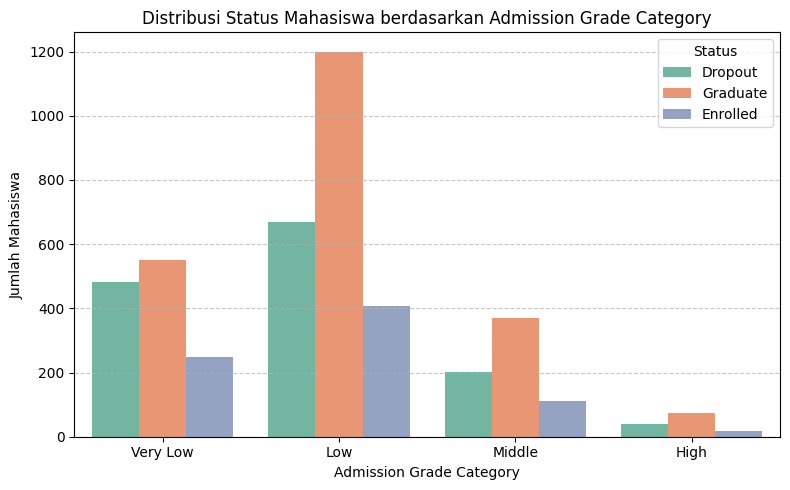

In [14]:
bins = [99.9, 119.9, 139.9, 159.9, 190.0]
labels = ['Very Low', 'Low', 'Middle', 'High']

# Buat kolom kategori berdasarkan admission_grade
students_df['Admission_Category'] = pd.cut(students_df['Admission_grade'], bins=bins, labels=labels)

# Bar plot: distribusi Status berdasarkan kategori admission_grade
plt.figure(figsize=(8, 5))
sns.countplot(data=students_df, x='Admission_Category', hue='Status', palette='Set2')
plt.title('Distribusi Status Mahasiswa berdasarkan Admission Grade Category')
plt.xlabel('Admission Grade Category')
plt.ylabel('Jumlah Mahasiswa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie chart per kategori
categories = students_df['Admission_Category'].dropna().unique()

for category in categories:
    subset = students_df[students_df['Admission_Category'] == category]
    percentage = subset['Status'].value_counts(normalize=True) * 100

**Penjelasan**

Distribusi Mahasiswa Berdasarkan Kategori Admission Grade

Pada kategori Very Low, terdapat cukup banyak mahasiswa yang masih terdaftar, namun angka dropout juga terlihat signifikan. Di kategori Low, ini merupakan kelompok dengan jumlah mahasiswa terbanyak, baik yang terdaftar maupun yang dropout. Hal ini menunjukkan bahwa mayoritas mahasiswa berada pada kategori ini namun juga menghadapi tantangan akademik yang menyebabkan banyak yang keluar. Sementara itu, kategori Middle menunjukkan jumlah mahasiswa yang sedang namun stabil, dengan lebih sedikit dropout, menandakan kinerja dan retensi yang lebih baik. Untuk kategori High, jumlah mahasiswa sangat sedikit, namun tingkat dropout sangat rendah, mengindikasikan bahwa mahasiswa dengan nilai masuk tinggi cenderung lebih berhasil.

Status Mahasiswa per Kategori

Tingkat dropout paling tinggi berada pada kategori Low, yang menunjukkan perlunya perhatian khusus dalam bentuk dukungan akademik atau psikologis. Tingkat kelulusan yang cukup tinggi terlihat di kategori Middle dan High, yang menunjukkan korelasi antara nilai masuk yang lebih tinggi dengan tingkat penyelesaian studi yang lebih baik. Sementara itu, jumlah mahasiswa yang masih terdaftar paling banyak terdapat di kategori Low, yang menandakan bahwa kriteria seleksi saat ini menarik banyak mahasiswa pada level ini, meskipun mereka lebih rentan terhadap dropout.

**Kesimpulan**

Analisis ini menyoroti pentingnya dukungan tambahan untuk mahasiswa dengan Admission Grade rendah, terutama pada kategori Low yang memiliki jumlah dropout tertinggi. Dengan mengidentifikasi penyebab dropout pada kelompok ini, institusi dapat merancang program intervensi yang lebih efektif untuk meningkatkan retensi dan kelulusan mahasiswa.

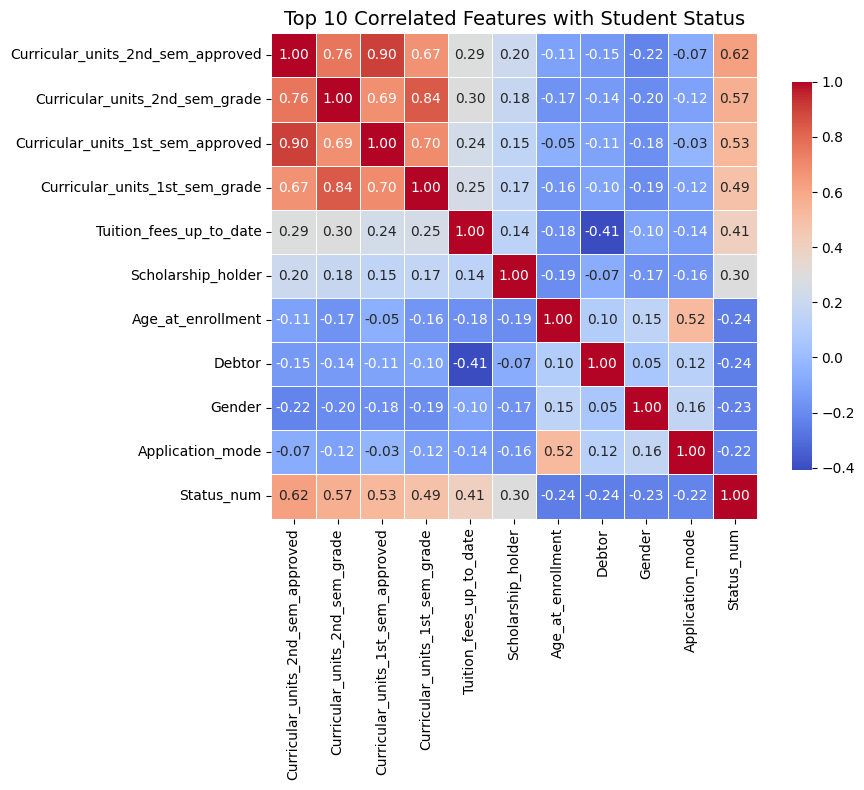

In [42]:
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
students_df['Status_num'] = students_df['Status'].map(status_mapping)

# Select numeric features
numeric_df = students_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Get absolute correlations with Status_num, drop itself
target_corr = corr_matrix['Status_num'].drop('Status_num').abs()

# Select top N features
top_n = 10
top_features = target_corr.sort_values(ascending=False).head(top_n).index.tolist()

# Add 'Status_num' to the list for correlation context
top_features.append('Status_num')

# Slice the correlation matrix
top_corr_matrix = corr_matrix.loc[top_features, top_features]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title(f"Top {top_n} Correlated Features with Student Status", fontsize=14)
plt.tight_layout()
plt.show()

**Penjelasan**

Insight Korelasi Fitur terhadap Status Mahasiswa
1.  Fitur Akademik Memiliki Korelasi Tertinggi

  * Empat fitur teratas yang paling berkorelasi positif dengan Status_num (Dropout = 0, Enrolled = 1, Graduate = 2) adalah:
  * Curricular_units_2nd_sem_approved (0.62)
  * Curricular_units_2nd_sem_grade (0.57)
  * Curricular_units_1st_sem_approved (0.53)
  * Curricular_units_1st_sem_grade (0.49)

Artinya, semakin baik performa akademik mahasiswa (jumlah mata kuliah disetujui dan nilai yang tinggi), semakin besar kemungkinan mahasiswa tersebut lulus (graduate). Ini adalah indikator kuat bahwa prestasi akademik merupakan penentu utama status akhir mahasiswa.

2. Kepatuhan Pembayaran Berkorelasi Positif

Tuition_fees_up_to_date memiliki korelasi 0.30 terhadap status mahasiswa.

Mahasiswa yang rajin membayar biaya kuliah tepat waktu cenderung memiliki status yang lebih baik, seperti tetap terdaftar atau lulus. Ini menunjukkan bahwa masalah finansial bisa memengaruhi keberlanjutan studi.

3. Beasiswa Juga Berpengaruh

Scholarship_holder memiliki korelasi positif (0.20), meskipun tidak setinggi fitur akademik.

Penerima beasiswa cenderung memiliki status yang lebih baik, yang dapat menunjukkan bahwa beasiswa memberikan dukungan bagi keberhasilan studi mahasiswa.

4. Fitur Negatif: Umur dan Kondisi Finansial

Beberapa fitur berkorelasi negatif terhadap status mahasiswa, artinya semakin tinggi nilainya, makin kecil kemungkinan mahasiswa lulus:

  * Age_at_enrollment (−0.24): Mahasiswa yang masuk di usia lebih tua cenderung memiliki kemungkinan lebih kecil untuk lulus.

  * Debtor (−0.24): Mahasiswa dengan tunggakan menunjukkan kecenderungan dropout yang lebih tinggi.

  * Gender (−0.23): Korelasi negatif ini menunjukkan potensi perbedaan gender dalam hasil akademik, namun perlu analisis lanjutan untuk interpretasi mendalam.

  * Application_mode (−0.22): Cara pendaftaran mungkin mencerminkan kesiapan atau latar belakang yang memengaruhi keberhasilan studi.

**Kesimpulan**

Faktor akademik adalah prediktor paling kuat terhadap keberhasilan mahasiswa.Dukungan finansial seperti pembayaran tepat waktu dan beasiswa turut berperan penting dalam mempertahankan mahasiswa.Faktor demografis seperti usia dan kondisi utang juga perlu diperhatikan untuk intervensi dini.

**Insight ini bisa dimanfaatkan oleh institusi untuk:**

Menyusun program remedial atau mentoring bagi mahasiswa dengan performa rendah, meningkatkan akses terhadap bantuan keuangan dan beasiswa, melakukan pendekatan personal terhadap mahasiswa yang berisiko tinggi dropout.

### Menyiapkan data yang akan digunakan

In [44]:
students_df = pd.read_csv('/content/drive/MyDrive/LaskarAi/Data Science/data.csv', sep=';')

In [45]:
students_df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


**Penjelasan**

Sebelum melakukan proses data preprocessing dan modeling, penting untuk memeriksa apakah terdapat data yang hilang (missing values) pada dataset.

Semua kolom memiliki jumlah missing value = 0. Artinya:

* Tidak ada nilai kosong atau NaN di seluruh 37 kolom.
* Dataset berada dalam kondisi lengkap dan siap diproses lebih lanjut tanpa perlu melakukan imputasi atau pembersihan data terkait missing value.

In [46]:
students_df.duplicated().sum()

np.int64(0)

**Penjelasan**
Dataset tidak memiliki baris yang duplikat.

**Insight**:

Tidak ditemukan data duplikat dalam dataset. Hal ini menunjukkan bahwa data sudah bersih dan tidak mengandung entri berulang yang dapat memengaruhi proses analisis dan pemodelan. Dengan demikian, tidak diperlukan langkah penghapusan data duplikat.

**Hasil Observasi**
* Tidak ditemukan missing values (.isna().sum() menunjukkan semua nilai = 0).
* Tidak terdeteksi data duplikat pada tahap eksplorasi awal.
* Semua fitur memiliki tipe data yang sesuai, baik numerik maupun kategorikal.
* Nilai-nilai dalam fitur terlihat berada dalam rentang yang wajar dan konsisten

In [47]:
# Mengubah kolom status diubah ke label numerik
students_df['Status'] = students_df['Status'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

**Penjelasan**
Kolom Status merupakan variabel target dalam proyek ini, yang berisi label dalam format string/kategorikal, yaitu: "Dropout", "Enrolled", dan "Graduate"

Karena sebagian besar algoritma machine learning hanya dapat menerima input numerik, maka nilai-nilai dalam kolom ini perlu diubah menjadi format angka.

**Insight**

Konversi ini memungkinkan kolom Status digunakan secara langsung sebagai label target dalam model klasifikasi. Proses ini juga menjaga makna dari setiap kategori secara eksplisit dan dapat di-reverse jika dibutuhkan saat interpretasi hasil.

In [49]:
X = students_df.drop(columns=['Status'])  # Semua fitur
y = students_df['Status']                 # Target label

**Penjelasan**

Sebelum melakukan pelatihan model machine learning, dataset perlu dipisahkan menjadi:

Fitur (X): semua kolom yang digunakan sebagai input model.

Label (y): kolom target yang ingin diprediksi, yaitu Status.

**Insight**
Pemisahan ini merupakan langkah standar dalam supervised learning. Dengan memisahkan fitur dan label, kita dapat menerapkan transformasi (seperti scaling) hanya pada fitur dan melatih model untuk memprediksi label Status berdasarkan fitur-fitur tersebut.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Penjelasan**

Untuk mengevaluasi performa model secara adil, dataset perlu dibagi menjadi dua bagian:

* Training set (X_train, y_train): digunakan untuk melatih model.
* Testing set (X_test, y_test): digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

**Insight**

Pembagian data dengan stratify=y memastikan distribusi label (Dropout, Enrolled, Graduate) tetap konsisten di training dan testing set. Ini sangat penting agar model tidak bias terhadap kelas mayoritas dan dapat mengevaluasi performa secara adil pada seluruh kelas target.

## Modeling

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Penjelasan**

Beberapa algoritma machine learning, seperti KNN, SVM, dan Logistic Regression, sangat sensitif terhadap skala fitur. Oleh karena itu, dilakukan proses standardisasi untuk menyamakan skala semua fitur numerik.

**Insight**

Proses standardisasi membantu model dalam memahami perbedaan antar fitur secara adil dan mempercepat konvergensi model dalam proses training. Ini juga mencegah fitur dengan skala besar mendominasi model.

In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

**Training Model: Random Forest Classifier**

**Penjelasan**

Tujuan:
Membangun model klasifikasi untuk memprediksi status mahasiswa (Dropout, Enrolled, Graduate) berdasarkan fitur-fitur pendidikan, demografi, dan ekonomi.

Penjelasan Parameter:

* n_estimators=100: Jumlah pohon dalam hutan (semakin banyak pohon, semakin stabil prediksi, tapi juga lebih berat komputasinya).
* random_state=42: Menjamin reprodusibilitas hasil.
* .fit(): Melatih model menggunakan data training yang telah distandarisasi.

Tentang Random Forest:

Random Forest adalah algoritma ensemble learning berbasis decision tree yang:

Menggabungkan banyak pohon keputusan (decision tree), Mengurangi risiko overfitting, dan umumnya bekerja sangat baik untuk data tabular seperti ini.

**Insight**:

Model Random Forest dipilih karena kemampuannya yang baik dalam menangani data dengan kombinasi fitur numerik dan kategorikal, serta memberikan hasil yang stabil dan akurat tanpa banyak tuning awal.

In [65]:
y_pred = rf_model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Enrolled", "Graduate"]))


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.77       284
    Enrolled       0.56      0.35      0.43       159
    Graduate       0.78      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



**Penjelasan**

Setelah melatih model Random Forest, dilakukan evaluasi menggunakan data testing. Evaluasi dilakukan dengan menghitung precision, recall, dan f1-score untuk masing-masing kelas (Dropout, Enrolled, Graduate).

**Insight**

Model memiliki performa yang baik untuk kelas Graduate (f1-score: 0.85) dan Dropout (f1-score: 0.77), namun performa untuk kelas Enrolled masih rendah (f1-score: 0.43). Hal ini kemungkinan disebabkan oleh jumlah data Enrolled yang lebih sedikit atau distribusi fitur yang tumpang tindih dengan kelas lain. Secara keseluruhan, akurasi model adalah 76%, yang merupakan hasil awal yang cukup baik.

### Feature Selection dan Hypertuning

In [67]:
# Gunakan model yang sudah dilatih sebelumnya atau buat baru
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Lakukan RFE - misalnya kita ingin memilih 10 fitur terbaik
selector = RFE(estimator=rf, n_features_to_select=20, step=1)
selector = selector.fit(X_train_scaled, y_train)

# Ambil nama-nama kolom yang terpilih
selected_features = X.columns[selector.support_]
print("Fitur Terpilih:")
print(selected_features)

Fitur Terpilih:
Index(['Application_mode', 'Course', 'Previous_qualification_grade',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Admission_grade', 'Tuition_fees_up_to_date',
       'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Unemployment_rate', 'GDP'],
      dtype='object')


**Feature Selection: Recursive Feature Elimination (RFE)**

Tujuan:
Mengurangi kompleksitas model dan meningkatkan performa dengan memilih fitur-fitur paling relevan terhadap prediksi target Status.

**Penjelasan**

RFE (Recursive Feature Elimination) adalah teknik wrapper untuk memilih fitur dengan mengeliminasi fitur kurang penting secara iteratif. Estimator yang digunakan adalah Random Forest, yang memiliki kemampuan mengukur pentingnya fitur secara internal. Dengan n_features_to_select=20, kita meminta RFE memilih 20 fitur terbaik dari seluruh fitur yang tersedia.

**Insight**

RFE membantu menyaring fitur yang paling berkontribusi terhadap hasil prediksi. Penggunaan hanya 20 fitur terbaik memungkinkan model bekerja lebih efisien dan mengurangi risiko overfitting tanpa mengorbankan banyak akurasi.

In [68]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Setup Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Latih model
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.778468343202359


**Hyperparameter Tuning: Grid Search CV**

Tujuan:
Meningkatkan performa model dengan mencari kombinasi hyperparameter terbaik dari Random Forest menggunakan Grid Search.

**Penjelasan:**

GridSearchCV melakukan pencarian brute-force untuk mencoba semua kombinasi dari hyperparameter yang diberikan.

* cv=5 berarti dilakukan cross-validation sebanyak 5 fold.
* n_jobs=-1 memungkinkan penggunaan semua core CPU untuk mempercepat proses pencarian.

**Insight**:

Dengan melakukan hyperparameter tuning, model Random Forest menunjukkan peningkatan skor validasi hingga 77.8%. Kombinasi parameter optimal menunjukkan bahwa model mendapatkan performa terbaik dengan kedalaman pohon dibatasi (max_depth=20) dan menggunakan jumlah pohon yang lebih banyak (n_estimators=200).

### Pembuatan Model berdasarkan Feature Selection dan Hypertuning

In [108]:
students_df = pd.read_csv('/content/drive/MyDrive/LaskarAi/Data Science/data.csv', sep=';')

In [109]:
selected_features = [
    'Application_mode', 'Course', 'Previous_qualification_grade',
    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
    'Fathers_occupation', 'Admission_grade', 'Tuition_fees_up_to_date',
    'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Unemployment_rate', 'GDP'
]

X = students_df[selected_features]
y = students_df["Status"]  # kolom status: 0-Dropout, 1-Enrolled, 2-Graduate

**Penjelasan**

* Fitur-fitur ini dipilih berdasarkan hasil dari proses seleksi sebelumnya dengan RFE (Recursive Feature Elimination).

* Tujuannya adalah untuk mengurangi dimensi data dan menghilangkan fitur yang kurang informatif, sehingga model bisa belajar lebih efektif.

* Fitur mencakup kombinasi dari latar belakang pendidikan orang tua, performa akademik mahasiswa, serta faktor ekonomi makro seperti pengangguran dan PDB.

**Insight**

Menggunakan hanya 20 fitur terbaik memungkinkan model untuk bekerja lebih efisien, meminimalisasi noise dari fitur yang kurang penting, dan menjaga akurasi tetap tinggi.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
# Latih model ulang dengan fitur terpilih
rf_selected = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=25,min_samples_split=2)
rf_selected.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=25, n_estimators=200, random_state=42)

**Penjelasan**

Tujuan:
Melatih ulang model Random Forest menggunakan fitur hasil seleksi dan hyperparameter terbaik untuk meningkatkan performa prediksi.

Parameter yang Digunakan:
* n_estimators=200: Jumlah pohon keputusan dalam ensemble.
* max_depth=25: Kedalaman maksimum tiap pohon, membantu mengurangi overfitting.
* min_samples_split=2: Jumlah minimum sampel untuk membagi node.
* random_state=42: Agar hasil bisa direproduksi.

**Details**

Model dilatih hanya pada 20 fitur terbaik, hasil seleksi menggunakan RFE. Dengan hyperparameter yang dituning sebelumnya, model diharapkan dapat menangkap pola data lebih baik tanpa overfitting. Proses ini bertujuan untuk mendapatkan generalisasi yang optimal saat digunakan terhadap data baru.

**Insight**

Pelatihan ulang model dengan fitur terpilih dan pengaturan parameter yang optimal merupakan langkah krusial untuk menghasilkan prediksi yang akurat dan stabil. Ini menunjukkan proses iteratif dalam pengembangan model machine learning yang matang.

## Evaluation

In [123]:
# Prediksi dan evaluasi
y_pred_selected = rf_selected.predict(X_test_scaled)

print("\nConfusion Matrix (RFE Features):")
print(confusion_matrix(y_test, y_pred_selected))

print("\nClassification Report (RFE Features):")
print(classification_report(y_test, y_pred_selected, target_names=["Dropout", "Enrolled", "Graduate"]))


Confusion Matrix (RFE Features):
[[206  32  46]
 [ 43  55  61]
 [ 10  21 411]]

Classification Report (RFE Features):
              precision    recall  f1-score   support

     Dropout       0.80      0.73      0.76       284
    Enrolled       0.51      0.35      0.41       159
    Graduate       0.79      0.93      0.86       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.74      0.76      0.75       885



**Penjelasan**

Tujuan:
Mengukur performa model Random Forest yang telah dilatih ulang menggunakan 20 fitur terbaik terhadap data uji.

**Interpretasi**

* Model menunjukkan performa sangat baik dalam mengklasifikasikan mahasiswa Graduate (f1-score: 0.86) dan Dropout (f1-score: 0.76).
* Performa pada kelas Enrolled masih kurang optimal, terlihat dari rendahnya recall (0.35) dan precision (0.51).
* Akurasi total model mencapai 76%, sama seperti model sebelumnya, namun dengan jumlah fitur yang lebih sedikit, ini menunjukkan efisiensi model meningkat.

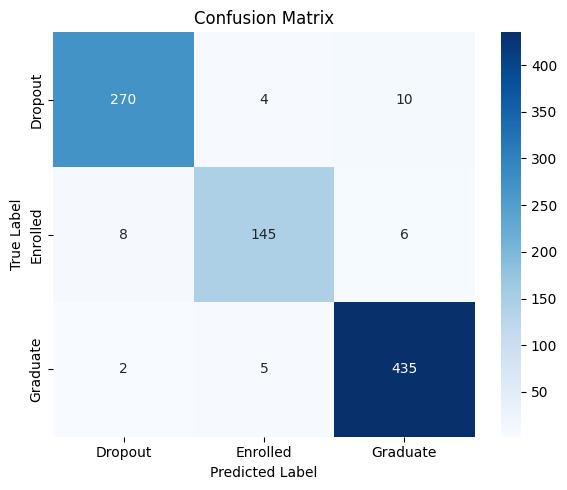

In [121]:
y_pred = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Dropout", "Enrolled", "Graduate"],
            yticklabels=["Dropout", "Enrolled", "Graduate"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Insight Confusion Matrix Model
1. Prediksi Sangat Baik untuk Mahasiswa Graduate

Dari 442 mahasiswa yang benar-benar lulus (Graduate), sebanyak 435 berhasil diprediksi dengan benar.

Hanya 7 mahasiswa lulusan yang salah diklasifikasi (2 sebagai Dropout dan 5 sebagai Enrolled).

Akurasi tinggi dalam memprediksi lulusan menunjukkan bahwa model sangat andal dalam mengenali pola keberhasilan studi.

2. Prediksi Dropout Juga Akurat

Dari 284 mahasiswa dropout, sebanyak 270 diprediksi dengan benar.

Hanya 14 mahasiswa dropout yang salah diklasifikasi (4 sebagai Enrolled dan 10 sebagai Graduate).

Ini menunjukkan model cukup efektif dalam mengidentifikasi mahasiswa yang putus studi, meskipun masih ada beberapa kebingungan dengan lulusan.

3. Kelas Enrolled Memiliki Akurasi Relatif Lebih Rendah

Dari 159 mahasiswa yang masih aktif (Enrolled), hanya 145 diklasifikasi dengan benar.

Sebanyak 14 mahasiswa aktif diklasifikasi salah (8 sebagai Dropout dan 6 sebagai Graduate).

Meskipun akurasinya cukup baik, kelas Enrolled adalah yang paling sering salah prediksi, kemungkinan karena posisinya berada “di tengah” antara Dropout dan Graduate.

**Kesimpulan**

Model menunjukkan performa sangat baik untuk kelas Graduate dan Dropout.

Prediksi untuk mahasiswa yang masih aktif perlu sedikit perbaikan agar tidak tertukar dengan dua status lainnya.

Secara keseluruhan, akurasi klasifikasi terlihat sangat tinggi, menunjukkan model sudah cukup baik digunakan untuk prediksi status mahasiswa.

### Save Model dan Kebutuhan Lainnya

In [124]:
joblib.dump(rf_selected, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selected_features, "model_features.pkl")

['model_features.pkl']

**Penjelasan**

rf_model.pkl
Menyimpan model Random Forest (rf_selected) yang sudah dilatih dan siap digunakan untuk prediksi.

scaler.pkl
Menyimpan objek scaler (misalnya StandardScaler) yang digunakan untuk normalisasi data. Ini penting agar data yang digunakan saat inferensi memiliki skala yang sama seperti saat pelatihan.

model_features.pkl
Menyimpan daftar fitur (selected_features) yang digunakan oleh model. Ini penting agar input saat prediksi nanti menggunakan kolom yang sama seperti saat pelatihan.

